Total count of rows: 2854
Total number of dates in '%m/%d/%Y' format: 721
Total number of duplicates: 31
Total number of full names: 0
Dataset count: 0


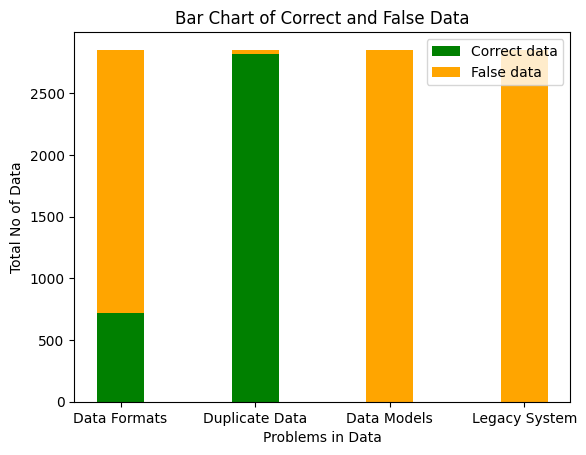

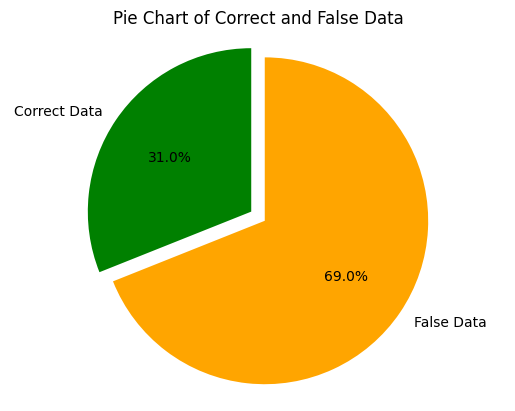

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import parser
import os

# Path to the file
file_path = '/content/drive/MyDrive/Thesis datasets/sales_data_sample - Copy.csv'
# Step 1: Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/Thesis datasets/sales_data_sample - Copy.csv', encoding='latin1')

# Step 2: Get the total count of rows
total_rows = data.shape[0]  # .shape[0] gives the number of rows
# Print total no of rows
print(f"Total count of rows: {total_rows}")



##Data Formats##
# Step 1: Define a regex pattern for "%m/%d/%Y"
date_pattern = r"^\d{2}/\d{2}/\d{4}$"

# Step 2: Count rows with dates matching the format
matching_format_count = data['Order Date'].astype(str).str.match(date_pattern).sum()

# Step 3: Print the count of matching dates
print(f"Total number of dates in '%m/%d/%Y' format: {matching_format_count}")


##Duplicate Data##
# Step 1: Find duplicates based on specific columns
duplicates_specific = data[data.duplicated(subset=['Order No','Product Line','Quantity Ordered','Price Each','Orderline Number','Sales'])]

# Step 2: Get the count of duplicated rows
duplicate_count = duplicates_specific.shape[0]

# Step 3: Print the count of duplicates
print(f"Total number of duplicates: {duplicate_count}")


##Lack of Data Models##
# Step 1: Check if 'Full Name' column exists
if 'Full Name' in data.columns:
    full_name_count = data['Full Name'].count()
else:
    full_name_count = 0

# Step 2: Print the result
print(f"Total number of full names: {full_name_count}")



##Integrating Data from Legacy Systems##
# Step 1: Check file extension
file_extension = os.path.splitext(file_path)[1].lower()  # Get the file extension

# Step 2: Load and count data based on file type
if file_extension == '.csv':
    # Load CSV file
    df = pd.read_csv(file_path, encoding='latin1')
    count = 0  # If the file is CSV, result is 0
elif file_extension == '.json':
    # Load JSON file
    df = pd.read_json(file_path)
    count = len(df)  # If the file is JSON, count the number of rows
else:
    # If the file is neither CSV nor JSON
    df = None
    count = 0

# Step 3: Print the result
print(f"Dataset count: {count}")


# Data
data = [
    { "Correct data": matching_format_count, "False data": total_rows - matching_format_count},
    { "Correct data": total_rows - duplicate_count, "False data": duplicate_count},
    { "Correct data": full_name_count, "False data": total_rows - full_name_count},
    { "Correct data": count, "False data": total_rows - count}
]

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Ensure numeric columns are converted to integers
df["Correct data"] = pd.to_numeric(df["Correct data"])
df["False data"] = pd.to_numeric(df["False data"])

# Bar chart
x_labels = ["Data Formats", "Duplicate Data", "Data Models", "Legacy System"]  # Labels for each row
width = 0.35  # Bar width

# Bar positions
x = range(len(df))

# Plot bars
plt.bar(x, df["Correct data"], width, label="Correct data", color="Green")
plt.bar(x, df["False data"], width, bottom=df["Correct data"], label="False data", color="Orange")

# Add labels and legend
plt.xlabel("Problems in Data")
plt.ylabel("Total No of Data")
plt.title("Bar Chart of Correct and False Data")
plt.xticks(x, x_labels)  # Set x-axis labels
plt.legend()

# Show the chart
plt.show()




##Pie Chart##
# Ensure numeric columns are converted to integers
df["Correct data"] = pd.to_numeric(df["Correct data"])
df["False data"] = pd.to_numeric(df["False data"])

# Calculate total for Correct and False data
total_correct = df["Correct data"].sum()
total_false = df["False data"].sum()

# Labels for the pie chart
labels = ["Correct Data", "False Data"]
sizes = [total_correct, total_false]
colors = ["green", "orange"]

# Plot Pie Chart
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90, explode=(0.1, 0))
plt.title("Pie Chart of Correct and False Data")

# Show the chart
plt.axis('equal')
plt.show()